<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/master/03-Deep-Learning/notebooks/06-CNN-Practicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Redes Neuronales Convoluciones (CNN)</h1>

En esta notebook practicaremos el uso de las redes CNN en varios conjuntos de datos y realizaremos algunas comparaciones con las redes MLP.

Verifiquemos que el entorno de ejecución en Colab sea GPU

In [ ]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# 1. MNIST Fashion

## El conjunto de datos

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
 <ul>
  <li>0 T-shirt/top</li>
  <li>1 Trouser</li>
  <li>2 Pullover</li>
  <li>3 Dress</li>
  <li>4 Coat</li>
  <li>5 Sandal</li>
  <li>6 Shirt</li>
  <li>7 Sneaker</li>
  <li>8 Bag</li>
  <li>9 Ankle boot</li>
</ul>

Creamos un diccionario con los nombres de las clases

In [ ]:
prendas_list = ['Camiseta','Pantalones','Suéter','Vestido','Abrigo','Sandalia','Camisa','Sneaker','Bolsa','Botín']

prendas = dict(enumerate(prendas_list))
prendas

Cargamos del dataset

In [ ]:
from keras.datasets import fashion_mnist

(X_train, y_train_classes), (X_test, y_test_classes) = fashion_mnist.load_data()

print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train_classes.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test_classes.shape}")

## Separación en Entrenamiento, Validación y Prueba

Obtenemos las clases como vectores *one-hot*

In [ ]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train_classes, num_classes)
y_test = to_categorical(y_test_classes, num_classes)

Normalizamos

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Dividimos en train-validation-split

In [ ]:
# Las primeras 10,000 muestras para entrenamiento
X_train = X_train[:-10000]
y_train = y_train[:-10000]

# Reserva las últimas 10,000 muestras para validación
X_val = X_train[-10000:]
y_val = y_train[-10000:]

print('Train size:', X_train.shape[0])
print('Validation size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Obtenemos una versión *aplanada* del dataset. Cada imagen de 28$\times$28 ahora es un vector de 784 componentes.

In [ ]:
X_train_flatten = X_train.reshape(-1, 784)
X_val_flatten = X_val.reshape(-1, 784)
X_test_flatten = X_test.reshape(-1, 784)

In [ ]:
print(X_train.shape,X_val.shape,X_test.shape)
print(X_train_flatten.shape,X_val_flatten.shape,X_test_flatten.shape)

Visualicemos algunas imágenes

In [ ]:
# tamaño del conjunto de instancias
m = y_train.shape[0]

# Elegimos algunas instancias al azar para mostrar
random_idxs = np.random.choice(m, 36, replace=False)
images = X_train[random_idxs, :, :].reshape((6,6,28,28))
images_labels = y_train_classes[random_idxs].reshape((6,6))

# visualización de las imágenes
fig, axs = plt.subplots(6,6,figsize=(8,6))
for i in range(6):
    for j in range(6):
        axs[i,j].imshow(images[i,j], cmap='Greys')
        axs[i,j].set_title(prendas[images_labels[i,j]], fontsize=9)
        axs[i,j].axis('off')
fig.show()

## ⭕ Práctica 1

* Entrenar una red MLP para clasificar este conjunto de entrenamiento. Puedes escoger libremente el número de capas, neuronas, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.

Matriz de confusión

In [ ]:
# model_mlp = ...

313/313 [==============================] - 1s 3ms/step


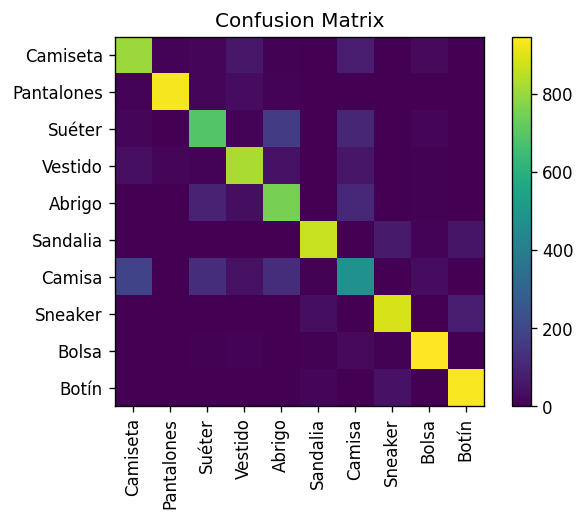

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model_mlp.predict(X_test_flatten)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

## ⭕ Práctica 2

Entrenar una red CNN para la misma tarea de clasificación. Puedes escoger libremente el número de capas, neuronas, dropout, funciones de activación, optimizador y épocas. Ten cuidado con el sobre-entrenamiento.
* Grafica las curvas de entrenamiento.
* Reportar el accuracy y la función de pérdida en el conjunto de prueba. Para esto, usa el método `predict`.
* Muestra la matriz de confusión.
* Compara el rendimiento de la MLP y la CNN.

In [ ]:
# model_cnn =

313/313 [==============================] - 1s 2ms/step


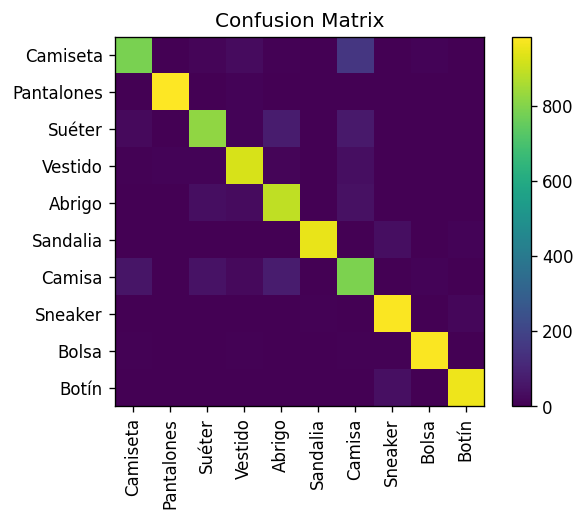

In [ ]:
from sklearn.metrics import confusion_matrix

y_hat = model_cnn.predict(X_test)

y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_hat, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4),dpi=120)
plt.imshow(conf_matrix)
plt.xticks(list(prendas.keys()),list(prendas.values()), rotation=90, ha='center')
plt.yticks(list(prendas.keys()),list(prendas.values()))
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()